<a href="https://colab.research.google.com/github/Kirithika-M/Machine-Learning-Lab/blob/main/ML_Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Experiment 7
#### Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
def generate_data(n_samples=300, n_centers=4, random_seed=42):
  np.random.seed(random_seed)
  points_per_center = n_samples // n_centers
  centers = np.random.uniform(-10, 10, (n_centers, 2))
  x = np.vstack([center + np.random.randn(points_per_center, 2) for center in centers])
  return x

In [3]:
# Calculate Euclidean Distance
def euclidean_distance(a, b):
  return np.sqrt(np.sum((a - b) ** 2))

In [12]:
# Compute the distance matrix
def compute_distance_matrix(x):
  n_samples = x.shape[0]
  distances = np.zeros((n_samples, n_samples))
  for i in range(n_samples):
    for j in range(i + 1, n_samples):
      distances[i, j] = euclidean_distance(x[i], x[j])
      distances[j, i] = distances[i, j]
  return distances

In [13]:
# Hierarchical Clustering
def hierarchical_clustering(x):
  distances = compute_distance_matrix(x)
  n_samples = len(x)

  # Initialize clusters
  clusters = [[i] for i in range(n_samples)]
  while len(clusters) > 1:
    # Find the two closest clusters
    min_dist = float('inf')
    to_merge = (None, None)

    for i in range(len(clusters)):
      for j in range(i + 1, len(clusters)):
        d = np.min([distances[p][q] for p in clusters[i] for q in clusters[j]])
        if d < min_dist:
          min_dist = d
          to_merge = (i, j)

    # Merge the two clusters
    i, j = to_merge
    clusters[i].extend(clusters[j])
    del clusters[j]

    return clusters

In [14]:
# Function to extract cluster labels
def extract_clusters(clusters, n_samples):
  labels = np.zeros(n_samples)
  for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
      labels[index] = cluster_id
  return labels

In [15]:
# Generate data and perform hierarchical clustering
x = generate_data()
final_clusters= hierarchical_clustering(x)

In [17]:
# Extract final cluster labels
cluster_labels = extract_clusters(final_clusters, len(x))

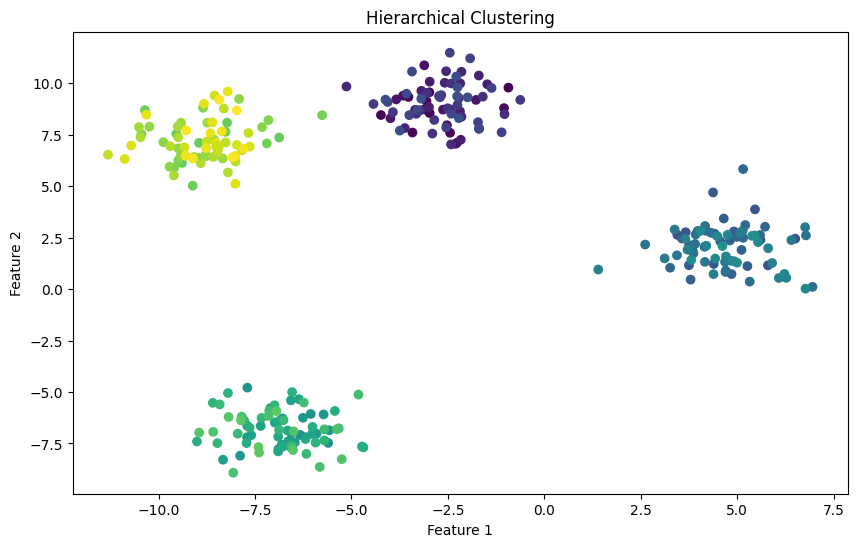

In [18]:
# Plot Hierarchical Clustering results
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()